(32, 32)


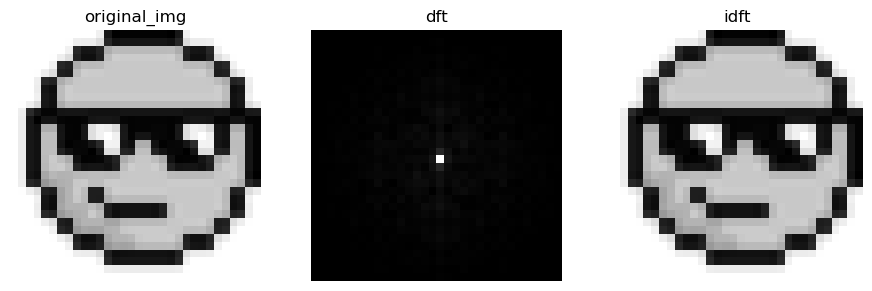

In [18]:
#  姓名：王安文
#  学号：122106010768
#  作业名：逆傅里叶变换的实现
#  课程：图像分析基础
#  作业实现内容：实现三种逆傅里叶变换 比较它们的区别

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# 傅里叶变换
def my_dft(img_array):
    height = img_array.shape[0]
    width = img_array.shape[1]
    # 复数的数组用来储存结果
    result_complex = np.zeros([height, width], np.complex64)
    # 遍历每一个像素
    j = complex(0, -1)
    for u in range(height):
        for v in range(width):
            for x in range(height):
                for y in range(width):
                    result_complex[u, v] += img_array[x, y] * np.exp(j * 2 * np.pi * (u * x / height + v * y / width))

    # 返回结果
    return result_complex

# 原始的逆傅里叶变化
def my_idft(img_array):
    # 数组的高度和宽度
    height = img_array.shape[0]
    width = img_array.shape[1]

    # 创建两个数组，复数的数组用来储存中间结果，浮点数的数组用来计算振幅
    result_complex = np.zeros([height, width], np.complex64)
    result = np.zeros([height, width], np.float64)

    # 遍历每一个像素，先计算复数结果，再对其求振幅
    # 逆变换与正变换的不同之一在于复数的符号
    j = complex(0, 1)
    for u in range(height):
        for v in range(width):
            for x in range(height):
                for y in range(width):
                    result_complex[u, v] +=  img_array[x, y] * np.exp(j * 2 * np.pi * (u * x / height + v * y / width))

            result[u, v] = np.abs(result_complex[u, v] / (height * width))

    # 返回结果
    return result

if __name__ == "__main__":
    img = Image.open("cool.bmp")
    img = img.convert('L')
    img = img.resize((32,32))
    img_array = np.array(img)

    mydft = my_dft(img_array) # 傅里叶变换
    mydft_abs = np.abs(mydft)  # 因为返回值为复数所以需要取振幅
    center = np.fft.fftshift(mydft_abs)  # 把结果移到中间

    myidft = my_idft(mydft)  # 傅里叶逆变换复原图像

    plt.figure(figsize=(11,11))
    plt.subplot(131), plt.imshow(img_array,cmap='gray'),
    plt.title('original_img'), plt.axis('off')
    plt.subplot(132), plt.imshow(center, cmap='gray'),
    plt.title('dft'), plt.axis('off')
    plt.subplot(133), plt.imshow(myidft, cmap='gray'),
    plt.title('idft'), plt.axis('off')






